In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

from db_utils import load_creds as lc
from db_utils import RDSDatabaseConnector 
from db_converter import DataConverter
from db_info import DataFrameInfo
from db_plot import Plotter
from db_transform import DataFrameTransform



In [3]:
connector = RDSDatabaseConnector
creds = lc('credentials.yaml')
db_connector = connector(**creds)
db_connector.initialize_engine()
df = db_connector.extract_data()

In [4]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,None,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,None,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [5]:

converter = DataConverter(df)
info = DataFrameInfo(df)
transformer = DataFrameTransform(df)

In [6]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,None,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,None,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [7]:
df_converted = converter.convert_to_categorical()
df_converted = converter.convert_to_datetime()
df_converted = converter.convert_to_float()
df_converted = converter.convert_to_object()

In [8]:
transformer.df = df_converted
skewed_columns = transformer.run_data_transformation_pipeline()

Checking for missing values:
Missing Values:
funded_amount                   5.544799
term (months)                   8.799395
int_rate                        9.531449
employment_length (years)       3.905515
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
last_payment_date               0.134609
next_payment_date              60.127971
last_credit_pull_date           0.012908
collections_12_mths_ex_med      0.094042
mths_since_last_major_derog    86.172116
dtype: float64

Dropping columns with >50% missing values:
Imputation of missing values:
Identifying skewed columns:
Skewed Columns: Index(['collection_recovery_fee', 'recoveries', 'total_rec_late_fee',
       'annual_inc', 'last_payment_amount', 'out_prncp_inv', 'out_prncp',
       'total_rec_int', 'total_payment', 'total_rec_prncp',
       'total_payment_inv'],
      dtype='object')



In [9]:
summary_df = info.summarize()
summary_df


,columns,data_types,mean,median,std_dev,unique_values,nulls,null_percentage
0,id,object,N/A,N/A,N/A,54231,0,0.000000
1,member_id,object,N/A,N/A,N/A,54231,0,0.000000
2,loan_amount,float64,13333.0761,12000.0,8082.196709,N/A,0,0.000000
3,funded_amount,float64,13161.335306,12000.0,7798.601691,N/A,0,0.000000
4,funded_amount_inv,float64,12952.622979,11300.0,8099.473527,N/A,0,0.000000
5,term (months),category,N/A,N/A,N/A,2,0,0.000000
6,int_rate,float64,13.474223,13.16,4.179539,N/A,0,0.000000
7,instalment,float64,400.013953,347.15,238.920012,N/A,0,0.000000
8,grade,category,N/A,N/A,N/A,7,0,0.000000
9,sub_grade,category,N/A,N/A,N/A,35,0,0.000000


In [10]:
missing_values_after = transformer.run_data_transformation_pipeline()
print("Missing Values After Imputation:\n", missing_values_after)

Checking for missing values:
Missing Values:
last_payment_date        0.134609
last_credit_pull_date    0.012908
dtype: float64

Dropping columns with >50% missing values:


Imputation of missing values:
Identifying skewed columns:
Skewed Columns: Index(['collection_recovery_fee', 'recoveries', 'total_rec_late_fee',
       'annual_inc', 'last_payment_amount', 'out_prncp_inv', 'out_prncp',
       'total_rec_int', 'total_payment', 'total_rec_prncp',
       'total_payment_inv'],
      dtype='object')

Missing Values After Imputation:
 Index(['collection_recovery_fee', 'recoveries', 'total_rec_late_fee',
       'annual_inc', 'last_payment_amount', 'out_prncp_inv', 'out_prncp',
       'total_rec_int', 'total_payment', 'total_rec_prncp',
       'total_payment_inv'],
      dtype='object')


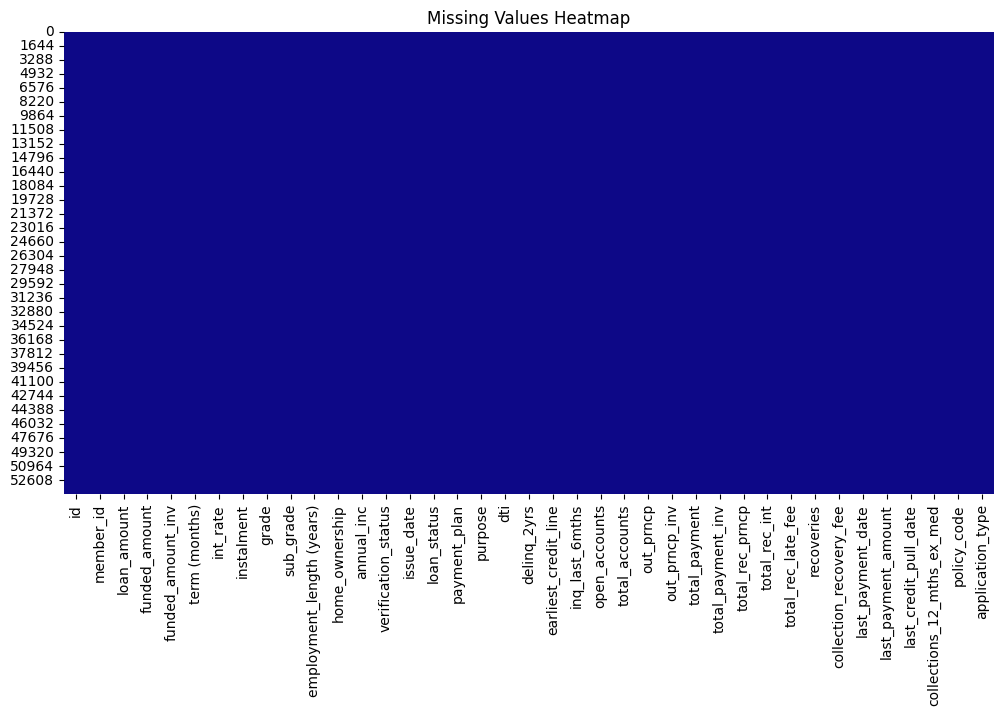

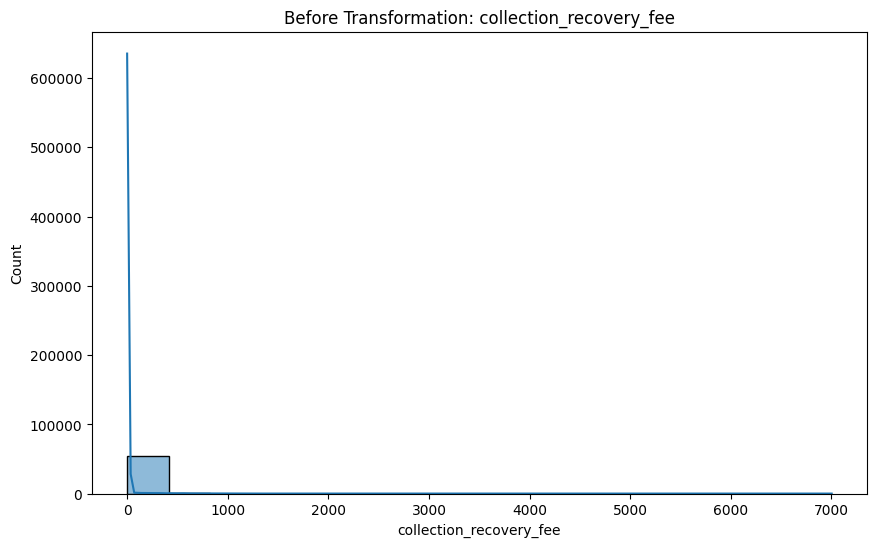

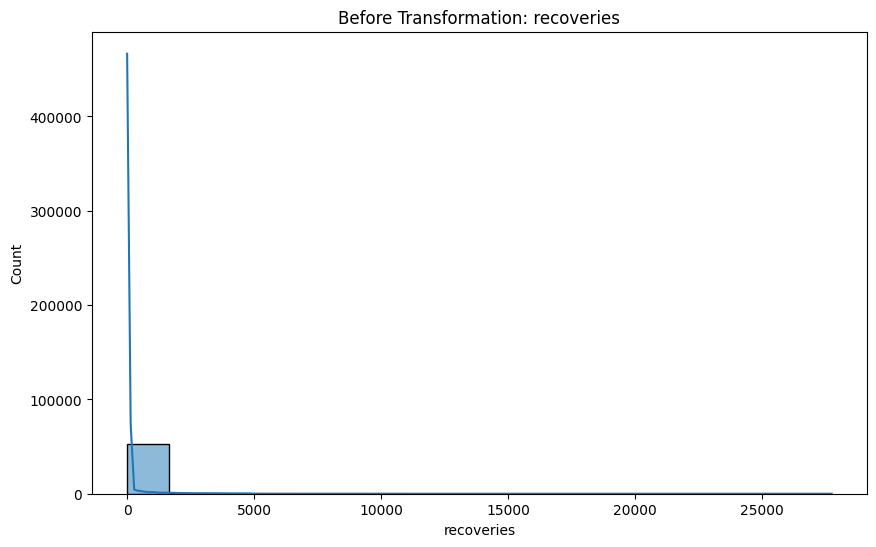

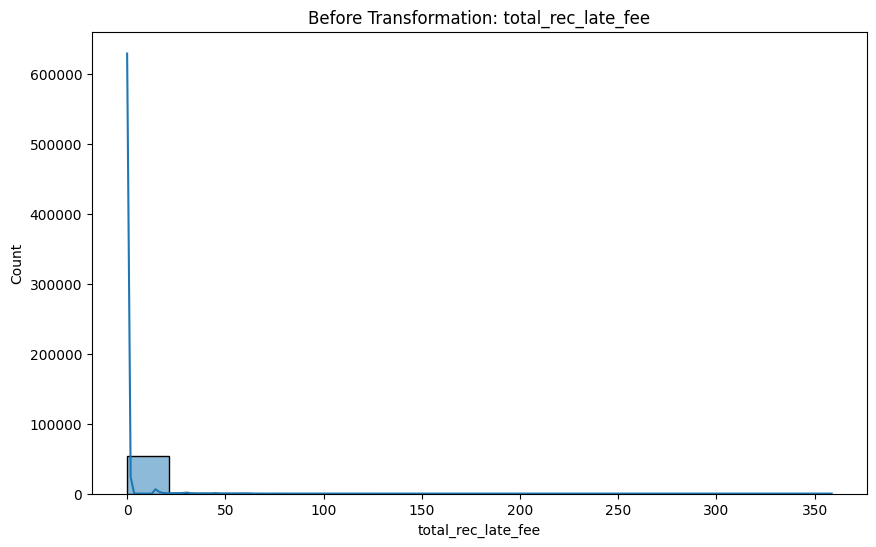

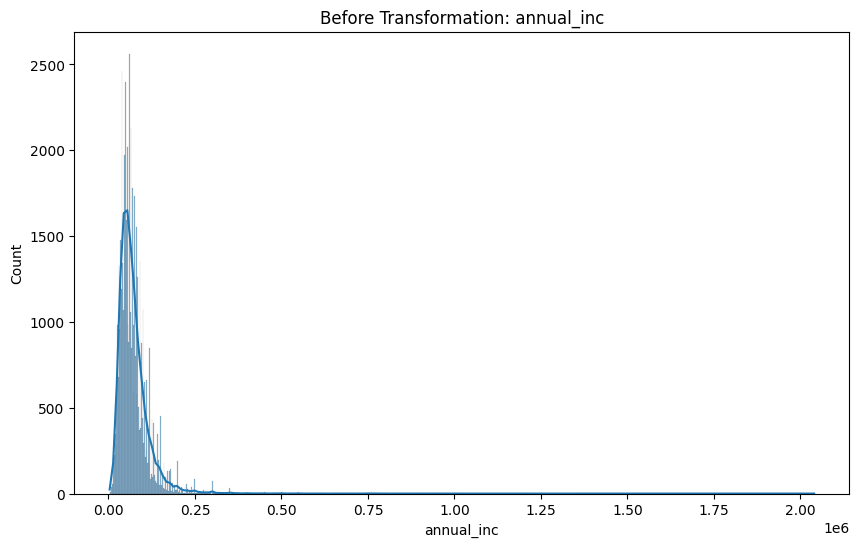

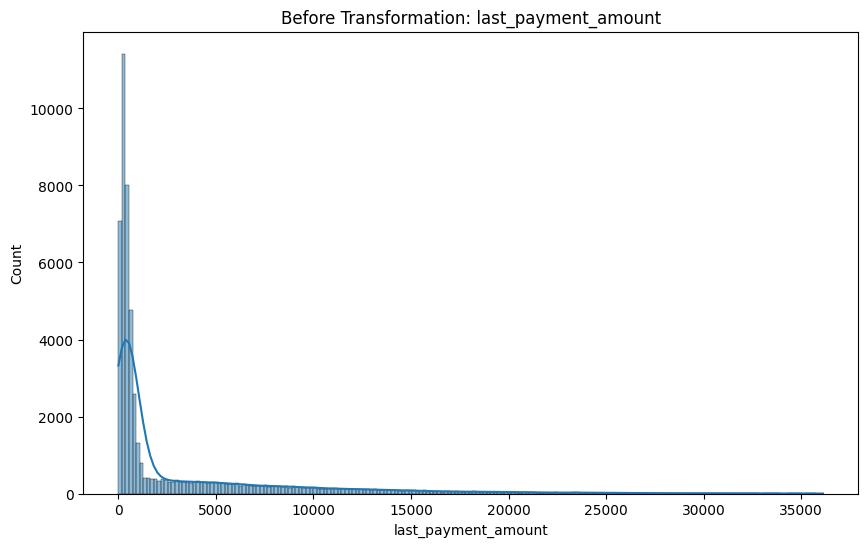

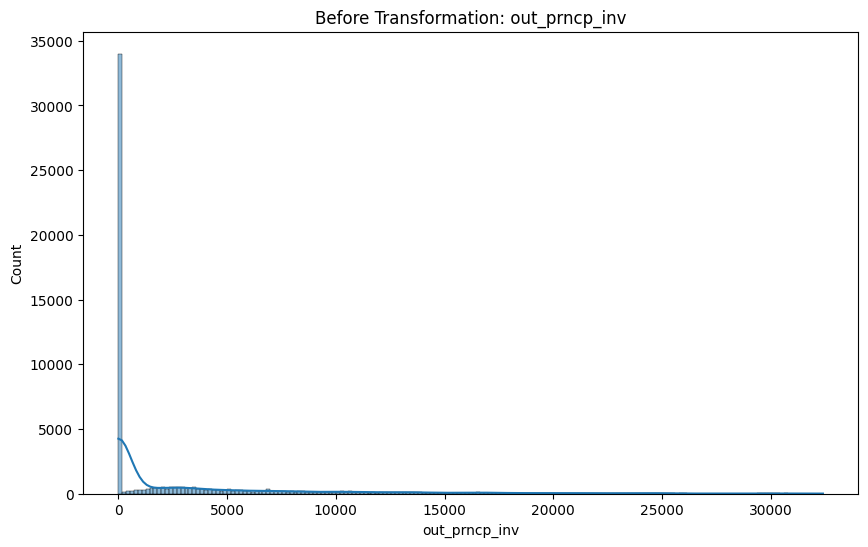

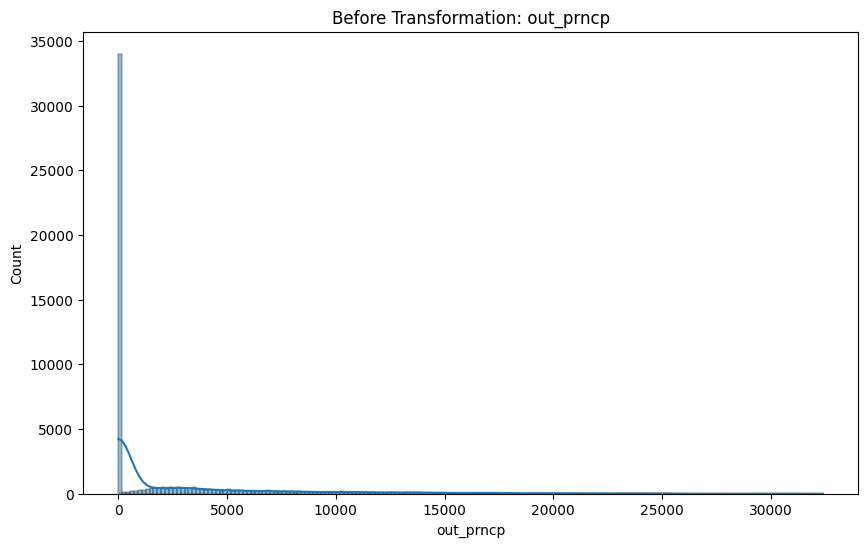

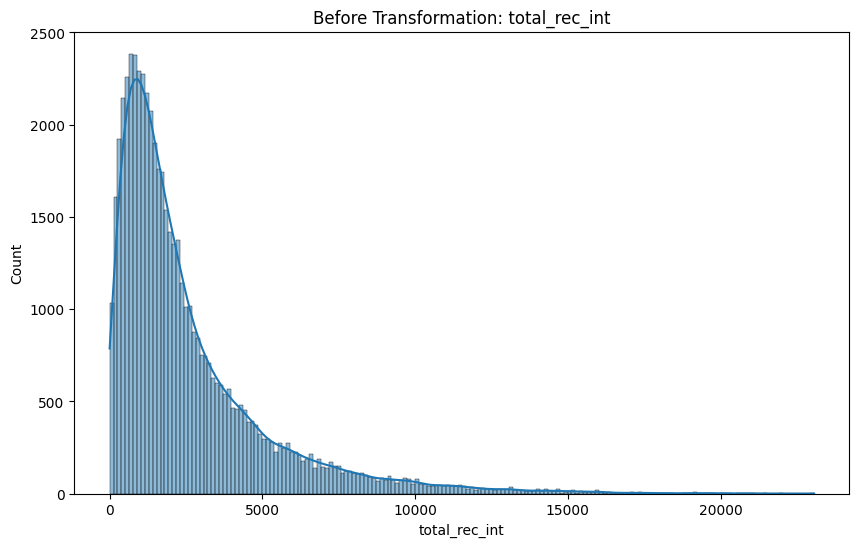

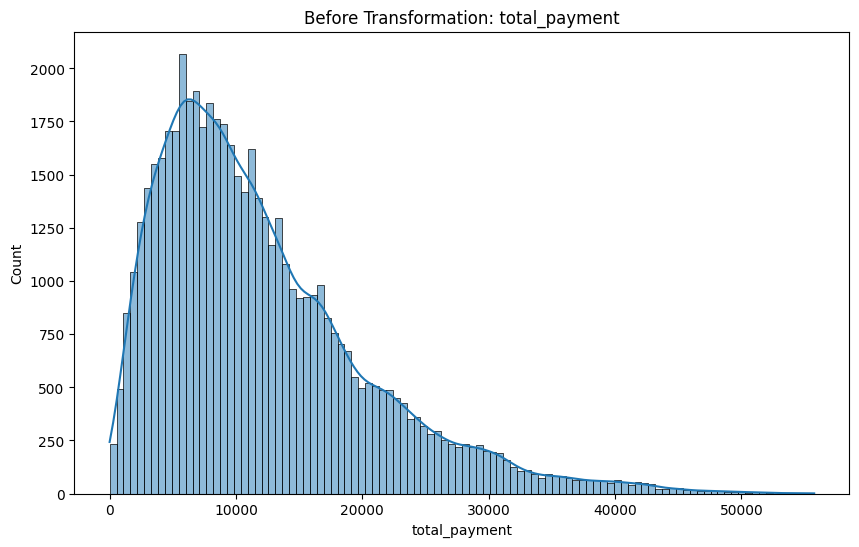

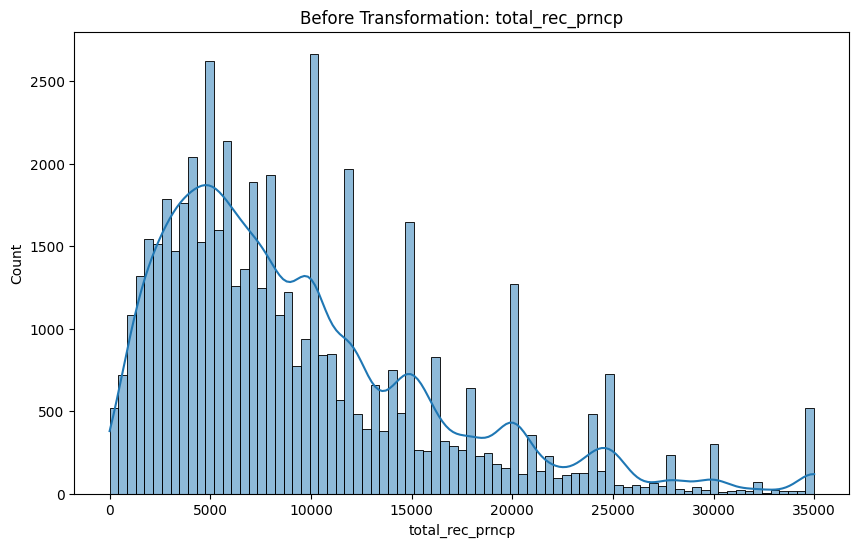

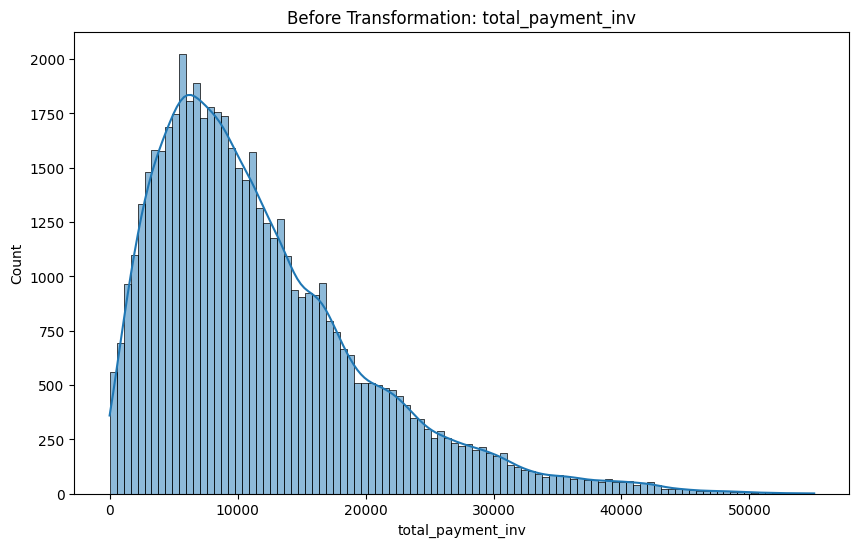

Skewed columns after filtering: ['collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'annual_inc', 'last_payment_amount', 'out_prncp_inv', 'out_prncp', 'total_rec_int', 'total_payment', 'total_rec_prncp', 'total_payment_inv', 'instalment', 'funded_amount', 'funded_amount_inv', 'loan_amount']
Existing columns in DataFrame: ['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term (months)', 'int_rate', 'instalment', 'grade', 'sub_grade', 'employment_length (years)', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_date', 'last_payment_amount', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'applic

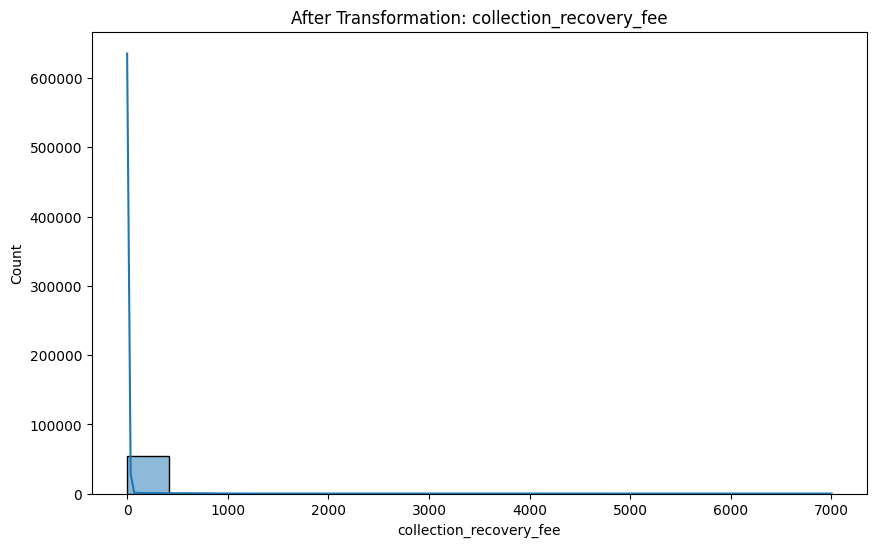

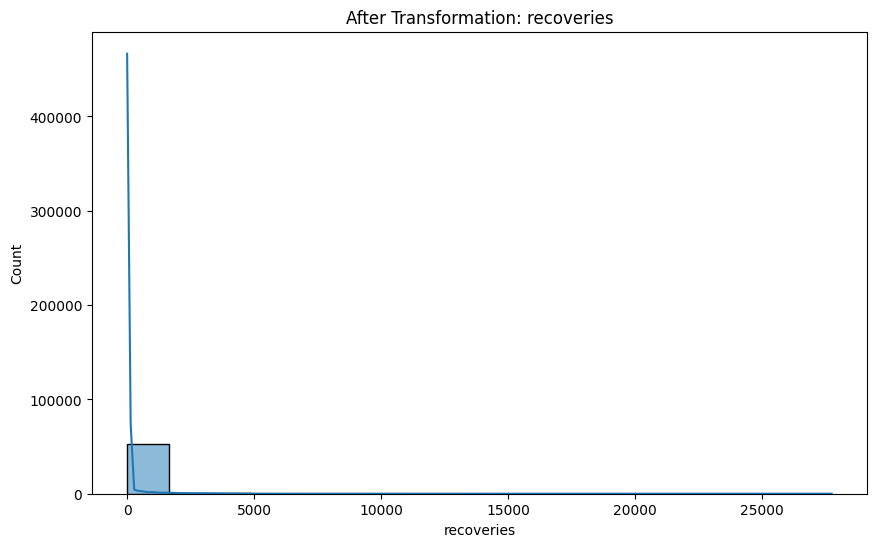

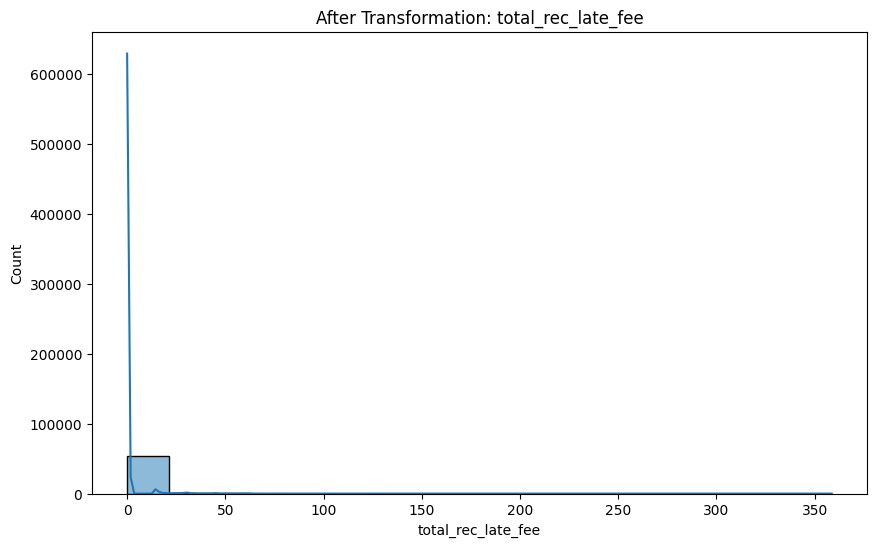

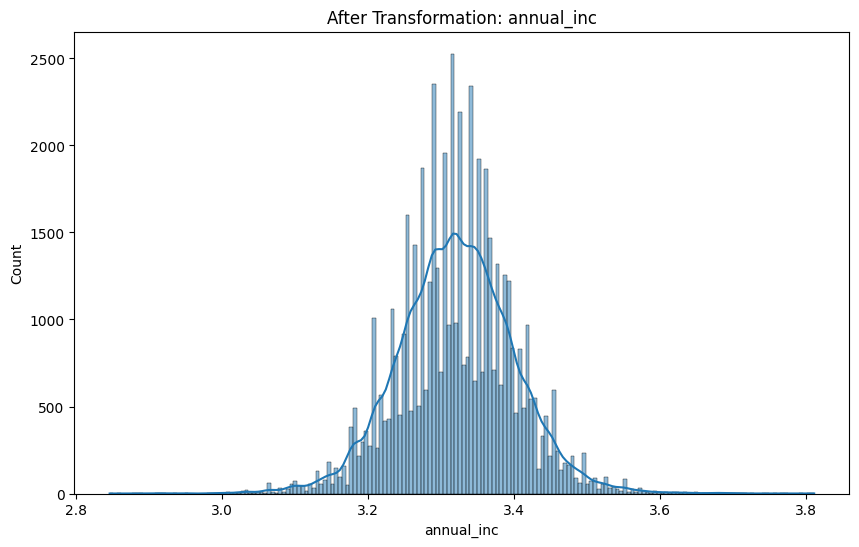

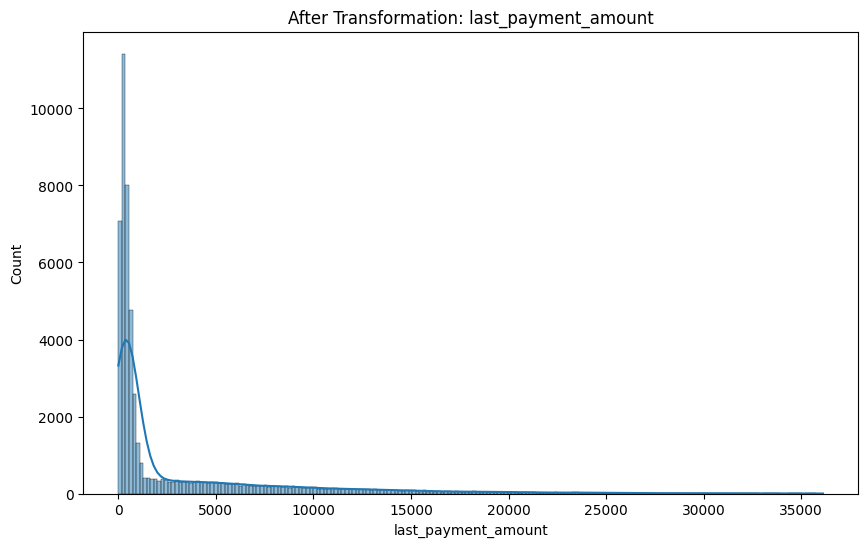

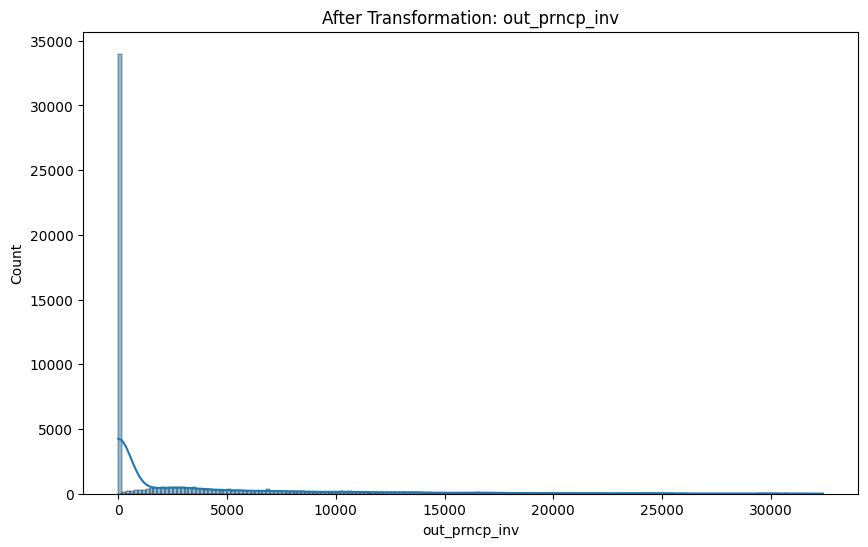

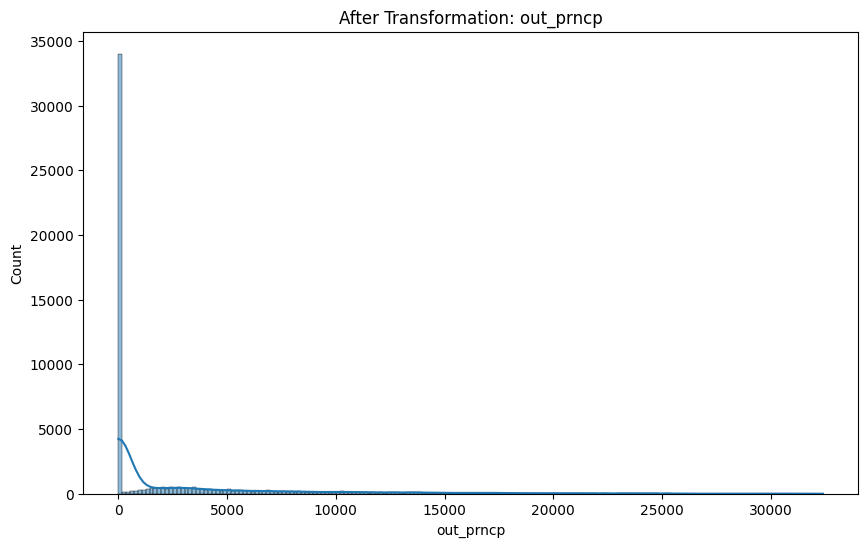

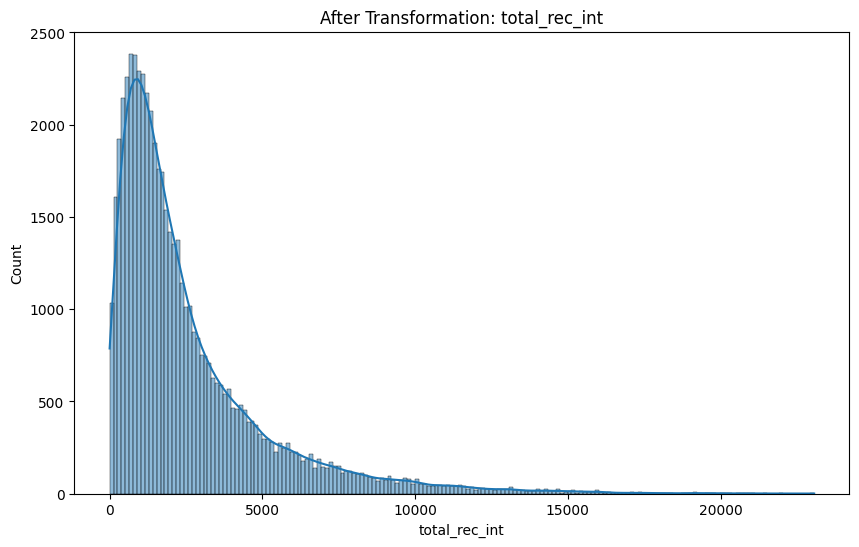

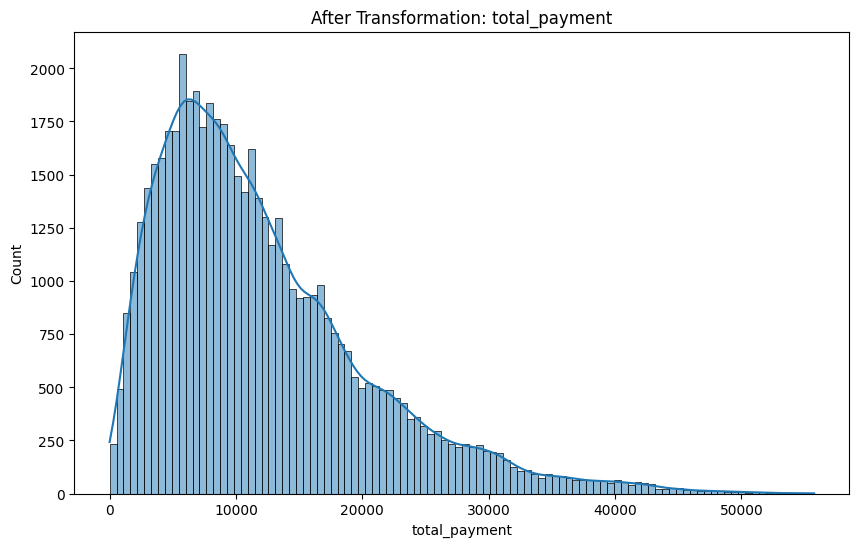

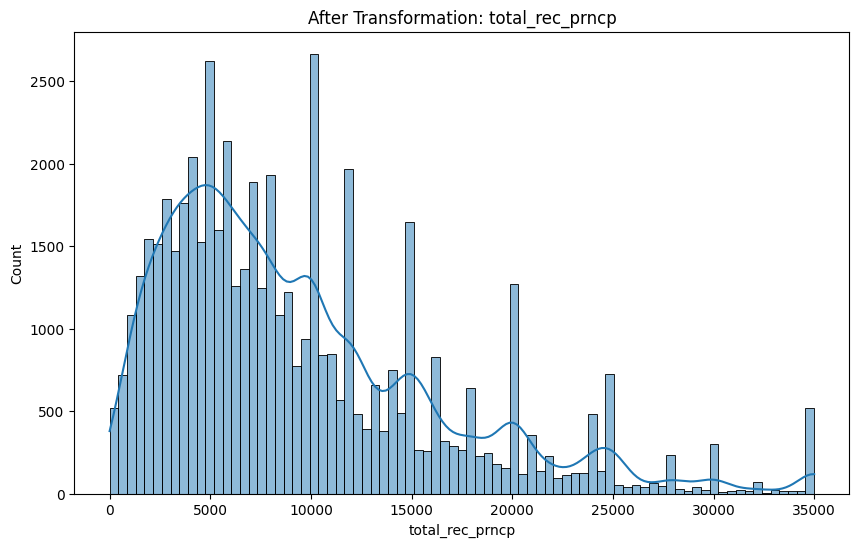

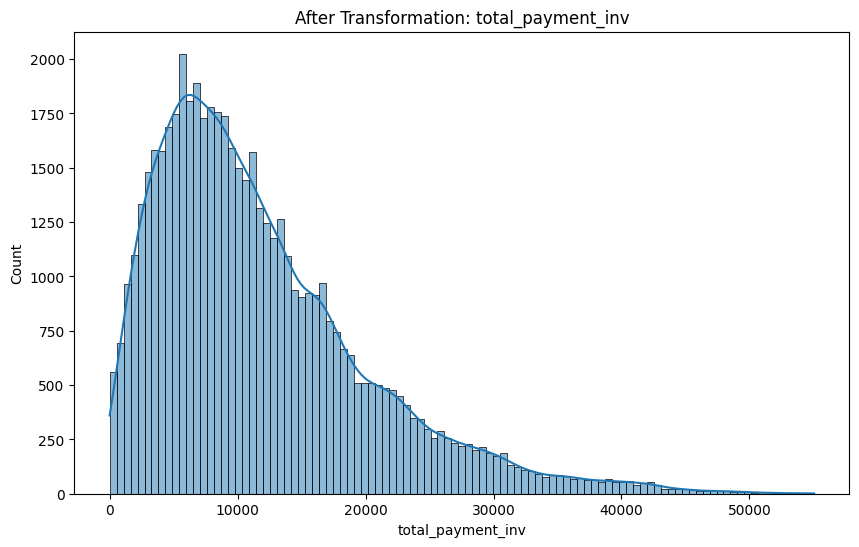

In [11]:
plotter = Plotter()
plotter.create_pdf('Source_Files/visualisations_nb.pdf')
plotter.plot_missing_values(transformer.df)
if not skewed_columns.empty:
    for column in skewed_columns:
        plotter.plot_histogram(transformer.df, column, title=f"Before Transformation: {column}")
        plt.show()

    data_frame = transformer.transform_skewed_columns() 

    for column in skewed_columns:
        plotter.plot_histogram(data_frame, column, title=f"After Transformation: {column}")
        plt.show()

plotter.close_pdf()